## Linear Support Vector Machine(SVM)

분류는 2개의 카테고리 데이터를 분류하는 선형 **Decision Boundary**를 찾는 것이 목적이다.

In [ ]:
# 실행 후 런타임을 재실행해주세요
!pip install joblib==1.1.0
!pip install mglearn

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### LinearSVM  기본

In [34]:
# 랜덤한 데이터 생성
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_features = 2, n_redundant = 0, n_informative = 1,
                          n_classes = 2, n_clusters_per_class = 1, random_state = 30)


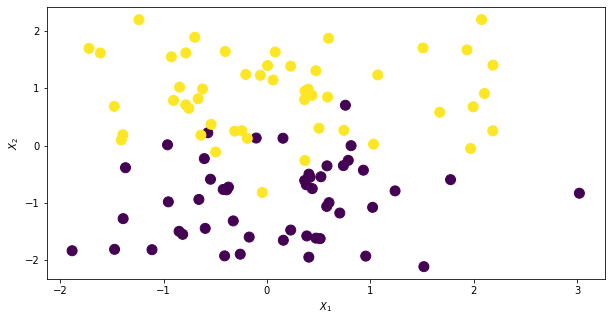

In [35]:
plt.figure(figsize = (10,5))
plt.scatter(X[:,0], X[:,1], c=y, marker = 'o', s=100)
plt.xlabel('$X_1$')
plt.ylabel("$X_2$")
plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [37]:
# 사이킷런의 SVM패키지 안에 서포트 벡터 머신의 모형 SVC(Support Vector Classifier)를 제공한다.

# step 1. 임포트 모델
from sklearn.svm import SVC

# 모델 선언 및 모델.fit(학습데이터)
linear_svc = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)



SVC의 매개변수
- kernel: 커널설정, 기본값은 'rbf' -> 우리는 linear로 하겠습니다. 

- C : 슬랙 변수 가중치(slack variable weight), 기본값은 1.0
    C는 얼마나 많은 데이터 샘플들이 다른 클래스로 예측되는지를 허용하는지를 정해준다.    
    즉, **모델의 오차 허용률**을 조절한다.  
    C값이 클수록 오류를 덜 허용하며 이를 하드 마진(hard margin)이라고 부른다.
    C값이 작을수록 오류를 더 많이 허용하며 이를 소프트 마진(soft margin)이라고 부른다.     
    즉, 높은 C값은 모델을 더 안정적으로 만들어주는 반면에, 낮은 C값은 모델을 더 유연하게 만들어준다. 

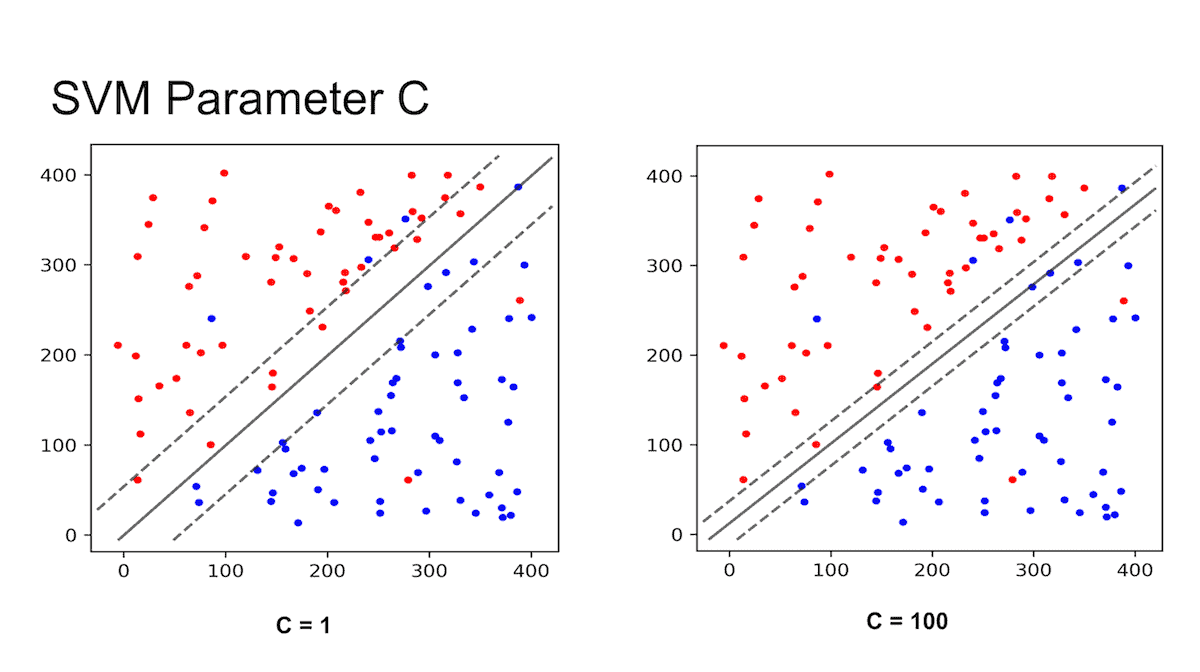

In [38]:
# 각 클래스의 서포트 벡터(Support vector)의 개수
linear_svc.n_support_

array([12, 13], dtype=int32)

In [39]:
# 각 클래스의 서포트 x값(X+, X-)
linear_svc.support_vectors_

array([[-6.05891634e-01, -2.27673875e-01],
       [-5.72031155e-01,  2.23315502e-01],
       [ 7.38732944e-01, -3.50239628e-01],
       [ 1.54638551e-01,  1.27789479e-01],
       [-9.61741304e-01,  1.31964138e-02],
       [ 8.13037304e-01, -1.77125524e-03],
       [ 7.58193569e-01,  7.04371769e-01],
       [ 9.32147964e-01, -4.30160921e-01],
       [ 7.85927562e-01, -2.57959730e-01],
       [-1.04378289e-01,  1.31391317e-01],
       [ 5.80123785e-01, -3.54179592e-01],
       [-1.36815913e+00, -3.86680912e-01],
       [-2.43243873e-01,  2.58245976e-01],
       [-1.47639136e+00,  6.83629163e-01],
       [-4.96680041e-01, -1.12196761e-01],
       [ 2.18328304e+00,  2.56673426e-01],
       [ 5.03043054e-01,  3.02706521e-01],
       [ 1.02999534e+00,  2.43675938e-02],
       [-4.56006658e-02, -8.20382239e-01],
       [ 7.43409431e-01,  2.66197855e-01],
       [-7.55261735e-01,  6.49574930e-01],
       [-1.39366737e+00,  1.87784548e-01],
       [ 3.66685623e-01, -2.60707536e-01],
       [-1.

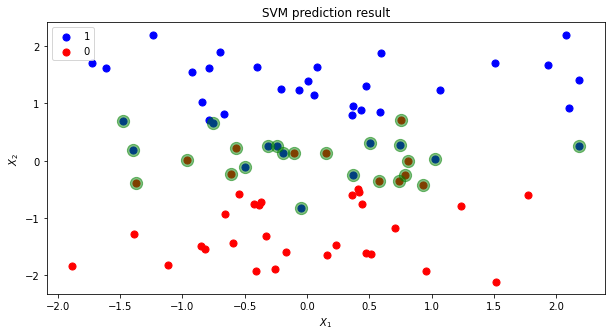

In [40]:
plt.figure(figsize = (10,5))
plt.scatter(X_train[y_train==1, 0], X_train[y_train ==1, 1], c = 'b', label = '1', s = 50)
plt.scatter(X_train[y_train==0, 0], X_train[y_train ==0, 1],  c= 'r', label = '0', s = 50)
plt.scatter(linear_svc.support_vectors_[:,0], linear_svc.support_vectors_[:,1], 
            s = 150, c = 'g', alpha = 0.5) #알파는 투명도

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend()
plt.title("SVM prediction result")

plt.show()

In [41]:
print('train_score: {}'.format(linear_svc.score(X_train, y_train)))
print('test_score: {}'.format(linear_svc.score(X_test, y_test)))

train_score: 0.9
test_score: 0.9


C :  0.01
train_score: 0.8875
test_score: 1.0


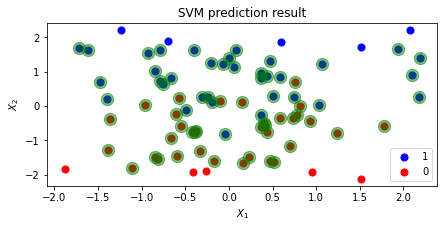

C :  0.1
train_score: 0.9
test_score: 0.95


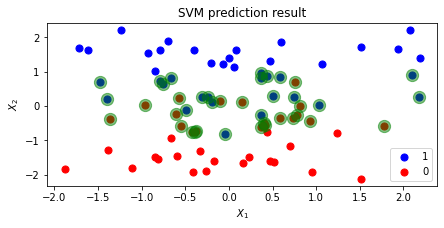

C :  1
train_score: 0.9
test_score: 0.9


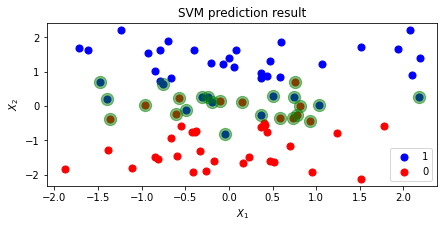

C :  10
train_score: 0.8875
test_score: 1.0


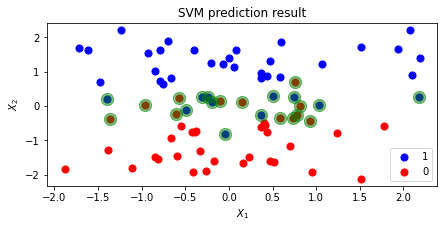

In [42]:
#값이 너무 극단적이기 때문에 C값을 조금 줄여서(규제를 줘서) 할 필요가 있음

C_list = [0.01, 0.1, 1, 10]

for c in C_list : 
    print("C : ", c)
    
    linear_svc = SVC(kernel = 'linear', C = c).fit(X_train, y_train)

    print('train_score: {}'.format(linear_svc.score(X_train, y_train)))
    print('test_score: {}'.format(linear_svc.score(X_test, y_test)))
    plt.figure(figsize = (7,3))
    plt.scatter(X_train[y_train==1, 0], X_train[y_train ==1, 1], c = 'b', label = '1', s = 50)
    plt.scatter(X_train[y_train==0, 0], X_train[y_train ==0, 1],  c= 'r', label = '0', s = 50)
    plt.scatter(linear_svc.support_vectors_[:,0], linear_svc.support_vectors_[:,1], 
                s = 150, c = 'g', alpha = 0.5) #알파는 투명도


    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")
    plt.legend()
    plt.title("SVM prediction result")

    plt.show()

### 실제 데이터에 적용하기

In [43]:
# 데이터 준비
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()
X = iris_data.data
y = iris_data.target

In [44]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [45]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

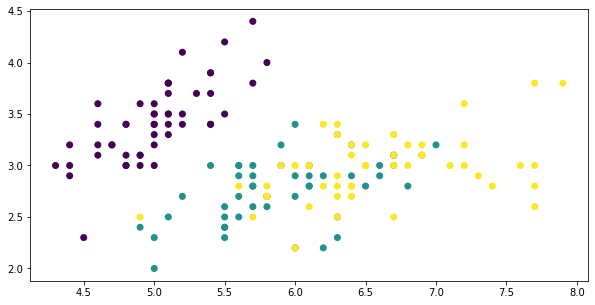

In [46]:
plt.figure(figsize = (10,5))
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   stratify = iris_data.target,
                                                     shuffle = True)

In [48]:
# 스케일링 하기
from sklearn.preprocessing import StandardScaler


In [49]:
# 선형 SVC 모델 객체 불러오고 학습시키기

from sklearn.svm import SVC


In [50]:
# train score

In [51]:
# test score 

#### 시각화
Decision Boundary 시각화를 위해 2가지 변수만 사용해보겠습니다. 

In [52]:
# 시각화를 위해 2개의 특성만 사용(sepal width, pedal length)
from sklearn.svm import SVC

data_x = iris_data.data[:, [1,3]]
data_y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, 
                                                    shuffle = True)
linear_svm = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
print("train score: {:.3f}".format(linear_svm.score(X_train, y_train)))
print('test score: {:.3f}'.format(linear_svm.score(X_test, y_test)))

train score: 0.958
test score: 0.967


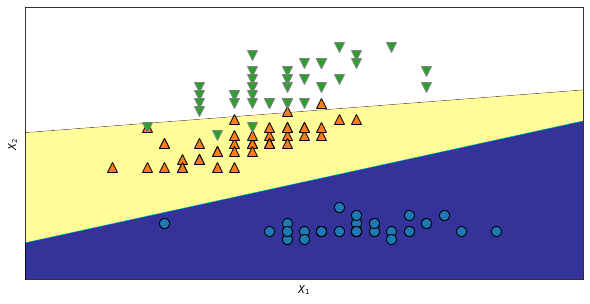

In [53]:
#시각화를 위해 mglearn 모듈 사용
import mglearn

plt.figure(figsize=(10,5))
mglearn.plots.plot_2d_classification(linear_svm, X_train, eps = 0.5, cm = 'terrain')
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

#2차원으로만 그림을 그린거라서 그림의 정확도가 그렇게 좋진 않음. 
#실제 모델은 정확도가 더 좋음. 
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

#### C값 변경

SVC  

* 주요 parameter:
 - `kernel` : 커널 타입['rbf', 'linear', 'poly', 'sigmoid', 'precomputed'], 기본값은 'rbf'  
        커널(kernel)은 선형으로 분리할 수 없는 점들을 분류하기 위해 사용한다.  
        커널을 통해 원래 가지고 있는 데이터를 더 높은 차원의 데이터로 변환할 수 있다.  
        
        RBF(Radial Bias Function):
        rbf커널 혹은 가우시안 커널이라고 불리며 무한차원까지 모든 다항식을 고려한다. 여러 커널 중 가장 성능이 좋아 자주 사용된다.  
<a title="Shehzadex, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png"><img width="512" alt="Kernel yontemi ile veriyi daha fazla dimensiyonlu uzaya tasima islemi" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png/512px-Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png"></a>  
커널을 통해 데이터를 더 높은 차원으로 변형함으로 나타냄으로써 결정 경계를 얻을 수 있다.  
[출처] <a href="https://commons.wikimedia.org/wiki/File:Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png">Shehzadex</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons

 - `C` : 슬랙 변수 가중치(slack variable weight), 기본값은 1.0  
        C는 얼마나 많은 데이터 샘플들이 다른 클래스로 예측되는지를 허용하는지를 정해준다. 즉, 모델의 오차 허용률을 조절한다.  
        C값이 클수록 오류를 덜 허용하며 이를 하드 마진(hard margin)이라고 부른다.  
        C값이 작을수록 오류를 더 많이 허용하며 이를 소프트 마진(soft margin)이라고 부른다.     
        즉, 높은 C값은 모델을 더 안정적으로 만들어주는 반면에, 낮은 C값은 모델을 더 유연하게 만들어준다.  
 - `gamma` : 학습 데이터에 얼마나 민감하게 반응할 것인지 결정(gamma는 
커널의 폭을 제어하는 매개변수, 기본값은 'scale'(= 1/(n_features*X.var())) 
        즉, 결정경계의 굴곡의 정도를 결정한다. 
        gamma값이 클수록 경계선에서 가까운 점들만이 계산에서 고려되어 결정경계의 굴곡이 높아진다.
        gamma값이 작을수록 경계선에서 멀리 떨어진 점들까지도 계산에서 고려되어 결정경계의 굴곡이 낮아진다.
        따라서, 높은 gamma값은 모델을 더 안정적으로 만들어주는 반면에, 낮은 gamma값은 모델을 더 유연하게 만들어준다.  
        
    ![c_gamma](https://tensorflowkorea.files.wordpress.com/2017/06/2-42.png?w=768)  
    C값이 클수록, gamma값이 클수록 결정경계를 더욱 안정적으로 만드는 것을 알 수 있다.  
    [출처] [tensorflow.blog](https://tensorflow.blog/%ed%8c%8c%ec%9d%b4%ec%8d%ac-%eb%a8%b8%ec%8b%a0%eb%9f%ac%eb%8b%9d/2-3-7-%ec%bb%a4%eb%84%90-%ec%84%9c%ed%8f%ac%ed%8a%b8-%eb%b2%a1%ed%84%b0-%eb%a8%b8%ec%8b%a0/#svm-understand)  




참고 : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC

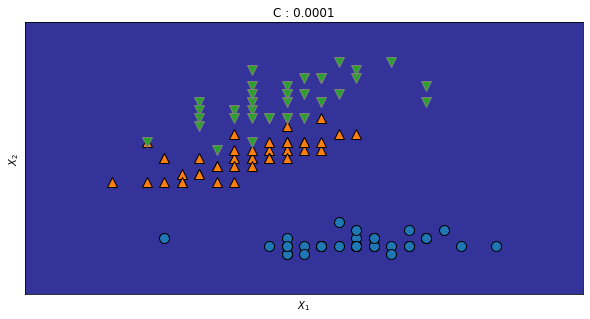

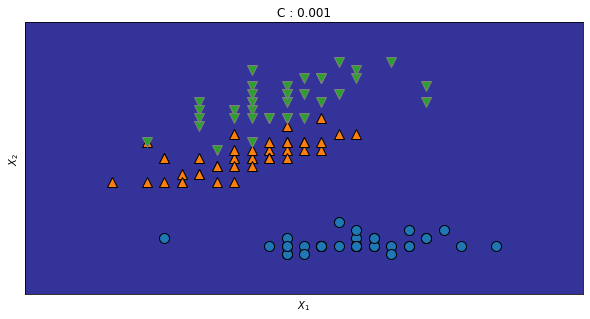

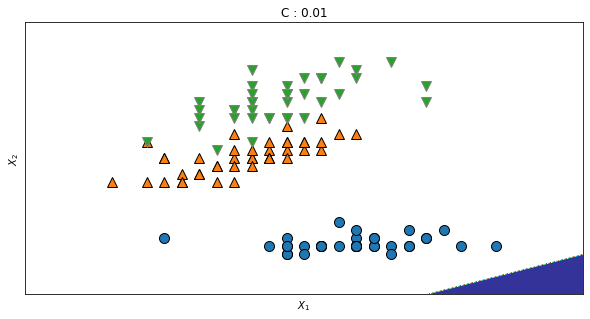

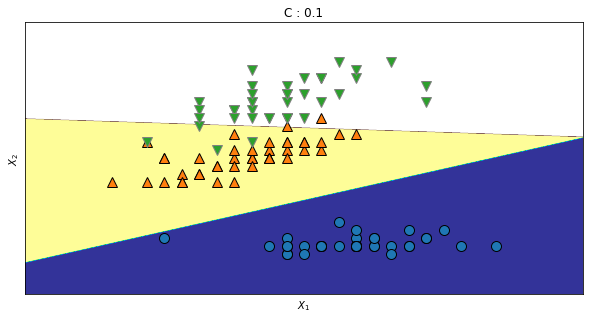

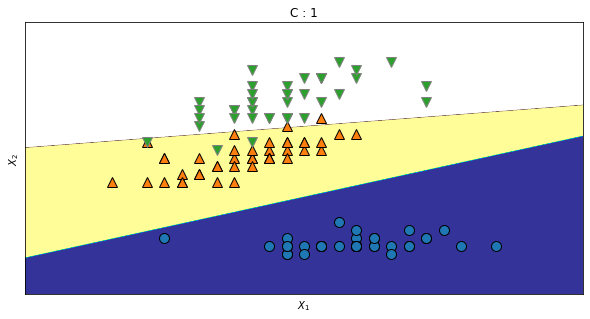

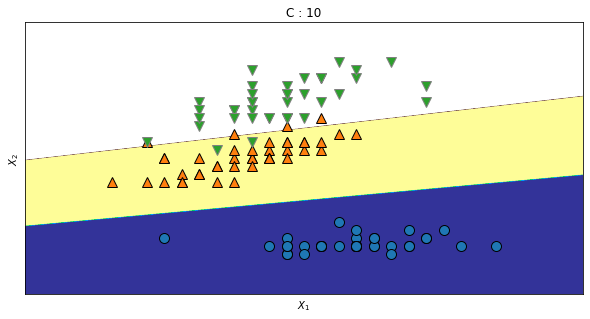

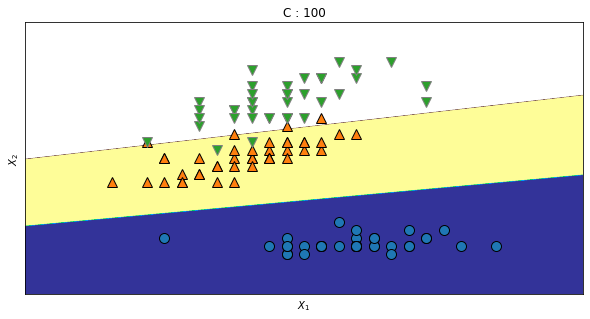

In [54]:
C_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
# C값이 커질 수록 마진이 작아진다. 
# C값을 변경해 가면서 각 모델들의 score를 확인하고자 한다.
# 한 번에 확인하기 위해서 C값을 리스트로 저장하고 for문을 이용하여 score를 구했다.

train_score = []
test_score = []

for C in C_list:
    linear_svm = SVC(kernel ='linear', C = C).fit(X_train, y_train)
    score_tr = linear_svm.score(X_train, y_train)
    score_te = linear_svm.score(X_test, y_test)
    train_score.append(score_tr)
    test_score.append(score_te)

    plt.figure(figsize=(10,5))
    mglearn.plots.plot_2d_classification(linear_svm, X_train, eps = 0.5, cm = 'terrain')
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

    plt.title(f"C : {C}")
    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')
    plt.show()

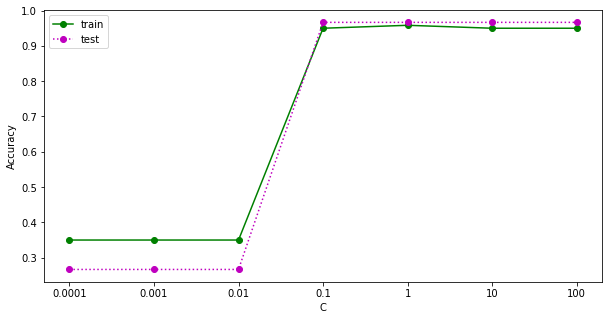

In [55]:
plt.figure(figsize=(10,5))
plt.plot(train_score, 'go-')
plt.plot(test_score, 'mo:')
plt.xticks(range(len(C_list)),C_list)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()
#hyper parameter tuning 방법에 따라 최적을 찾아주면 됨. 

### SVM.LinearSVC() 구현

In [56]:
from sklearn.svm import LinearSVC
linear_svc2 = LinearSVC(C = 1, loss ='hinge').fit(X_train, y_train)

In [57]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

data_iris = load_iris()
X = data_iris.data[:, [1,3]]
y = data_iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   stratify = data_iris.target,
                                                     shuffle = True)

In [58]:
print('train score : {:.3f}'.format(linear_svc2.score(X_train, y_train)))
print('test score : {:.3f}'.format(linear_svc2.score(X_test, y_test)))

train score : 0.884
test score : 0.868


LinearSVC()
  - kernel = 'linear'을 갖는 SVC()와 비슷하지만 libsvm이 아닌 liblinear의 관점에서 구현되어 규제와 loss함수 선택에 있어서 유연하며 데이터가 클 경우에 SVC()는 속도가 현저히 느려지기 때문에 LinearSVC()를 사용것을 권장한다.  
  - penalty 매개변수로 규제를 선택할 수 있으며, loss 매개변수로는 loss함수를 선택할 수 있다.  
  - pnealty의 기본값은 'l2'  
  - loss의 기본값은 'squared hinge', SVC(kernel = 'linear')와 같은 효과를 위해서는 'hinge'로 설정한다.  
  - 데이터의 스케일을 맞추지 않고 SVC 모델과 비교하게 되면 차이가 크게 난다. StandardScaler를 사용하면 데이터의 스케일을 자동으로 맞춰준다.

Hinge Loss

- 로지스틱 회귀는 WX의 값에 따라 0-1사이의 확률값으로 예측하지만, SVM은 0 아니면 1로 예측한다

- Logistic Regression의 Cost는 Z(Decision Boundary)가 아무리 커져도 0이 되지 않는다. 반면, SVM의 Cost는 Z가 1 or -1인 순간 0이 된다.

- 이를 Hinge Loss라고 하는데, 비확률적 분류 모델인 SVM의 Cost로 적합하다.

LinearSVC()의 주요 매개변수  
- 회귀 모델은 alpha
- LinearSVC와 LogisticRegression은 C 이다.
- alpha가 클수록, C가 작을수록 모델은 단순해진다.(규제가 커진다 -> Overfitting이 해소된다)

### 참고 : kernel 변경

In [59]:
from sklearn.datasets import make_circles

In [60]:
from sklearn.model_selection import train_test_split
X, y = make_circles(factor=0.5, noise=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

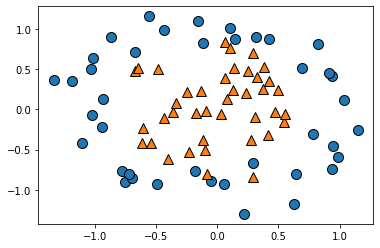

In [61]:
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [62]:
from sklearn.svm import SVC
svc_clf = SVC(kernel='rbf', C=1, gamma=1)
svc_clf.fit(X_train, y_train)

SVC(C=1, gamma=1)

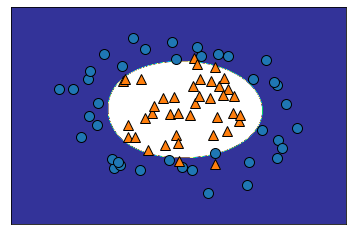

In [63]:
mglearn.plots.plot_2d_classification(svc_clf, X_train, eps=0.5, cm = 'terrain')
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [64]:
C_list = [0.01, 0.1, 1, 10]
gamma_list = [0.01, 0.1, 1, 10]

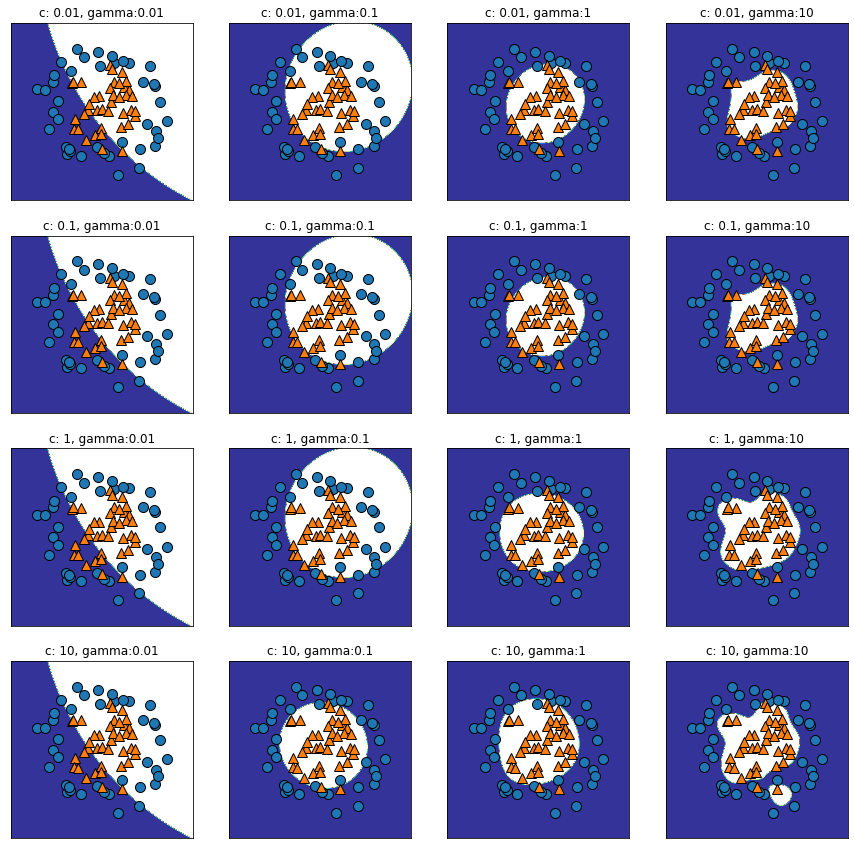

In [65]:
model_list = {}
count = 1
plt.figure(figsize=(15, 15))
for idx, c in enumerate(C_list):
    for idx2, gamma in enumerate(gamma_list):
        idx = idx+1
        idx2 = idx2 +1

        plt.subplot(4,4, count)
        count +=1

        svc_clf = SVC(kernel='rbf', C=c, gamma=gamma)
        model_key = (c, gamma)
        svc_clf.fit(X_train, y_train)

        model_list[model_key] = svc_clf
        plt.gca().set_title('c: {}, gamma:{}'.format(c, gamma))
        mglearn.plots.plot_2d_classification(svc_clf, X_train, eps=0.5, cm = 'terrain')
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)


## 직접 학습시켜봅시다. 


In [ ]:
from sklearn.datasets import load_wine
data = load_wine()

In [ ]:
# EDA

In [ ]:
# 전처리

In [ ]:
# 모델링

In [ ]:
# 성능평가